In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mb
import seaborn as sns

### Acquire

In [3]:
# read in csv
trades = pd.read_csv('TX_trades_2012-2014.csv')

In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22194 entries, 0 to 22193
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Trade Dt     22194 non-null  object 
 1   Settl Dt     22194 non-null  object 
 2   B/S          22194 non-null  object 
 3   Exec Time    22194 non-null  object 
 4   CUSIP        22194 non-null  object 
 5   Qty          22194 non-null  int64  
 6   Description  22194 non-null  object 
 7   Rate         22194 non-null  float64
 8   Var          4 non-null      object 
 9   Mat Dt       22194 non-null  object 
 10  St           22194 non-null  object 
 11  Price        22194 non-null  float64
 12  Yield        22194 non-null  float64
 13  Net          22194 non-null  object 
 14  YTM          22187 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 2.5+ MB


In [5]:
trades.describe()

,Qty,Rate,Price,Yield,YTM
count,22194.000000,22194.000000,22194.000000,22194.000000,22187.000000
mean,68.160088,4.604446,109.403779,2.505974,2.440408
std,128.122346,0.718508,6.752649,1.008119,1.838144
min,5.000000,0.000000,34.700000,0.000000,0.000000
25%,25.000000,4.000000,104.837750,1.754250,0.000000
50%,40.000000,5.000000,109.911500,2.526000,3.208000
75%,70.000000,5.000000,114.400000,3.257000,3.960000
max,2470.000000,6.880000,129.750000,6.840000,6.237000


In [6]:
trades.isna().sum()

Trade Dt           0
Settl Dt           0
B/S                0
Exec Time          0
CUSIP              0
Qty                0
Description        0
Rate               0
Var            22190
Mat Dt             0
St                 0
Price              0
Yield              0
Net                0
YTM                7
dtype: int64

In [7]:
# check to see which YTM are null
trades[trades['YTM'].isna()==True]

,Trade Dt,Settl Dt,B/S,Exec Time,CUSIP,Qty,Description,Rate,Var,Mat Dt,St,Price,Yield,Net,YTM
1153,11/13/2012,11/16/2012,B,13:57:39,052403DM1,245,AUSTIN TEX CMNTY COLLEGE DIST RFDG,5.00,NaN,8/1/2019,TX,123.983,0.000,"307,331.27",NaN
6014,2/13/2014,2/19/2014,B,12:05:18,235308JY0,25,DALLAS TEX INDPT SCH DIST BLDG DTC,4.00,NaN,8/15/2015,TX,104.720,0.000,"26,191.11",NaN
11542,3/18/2013,3/21/2013,B,14:53:41,442331VQ4,50,HOUSTON TEX RFDG-PUB IMPT-SER A DTC,5.00,NaN,3/1/2020,TX,120.001,0.000,"60,139.39",NaN
14680,10/16/2014,10/21/2014,B,15:07:11,527318JW0,30,LEVELLAND TEX CONS INDPT SCH DIST,4.25,NaN,2/15/2032,TX,109.000,3.018,"32,933.75",NaN
15096,10/31/2012,11/5/2012,B,10:17:58,54810CKG4,40,LOWER COLO RIV AUTH TEX REV RFDG,4.50,NaN,5/15/2029,TX,99.562,0.000,"40,674.80",NaN
16318,6/14/2012,6/19/2012,S,13:54:00,579117FF4,150,MC ALLEN TEX INTL TOLL BRDG REV SER,5.00,NaN,3/1/2019,TX,112.875,2.108,"172,062.50",NaN
20143,10/31/2012,11/5/2012,B,13:22:42,779222C63,25,ROUND ROCK TEX CTFS OBLIG DTC,4.50,NaN,8/15/2022,TX,111.258,0.000,"28,064.50",NaN


### Prepare

In [8]:
trades

,Trade Dt,Settl Dt,B/S,Exec Time,CUSIP,Qty,Description,Rate,Var,Mat Dt,St,Price,Yield,Net,YTM
0,10/7/2014,10/10/2014,B,12:36:15,00344NBK9,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,NaN,2/15/2022,TX,112.100,1.294,"28,215.97",3.142
1,10/21/2014,10/24/2014,S,9:52:58,00344NBK9,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,NaN,2/15/2022,TX,112.850,1.038,"28,452.08",3.026
2,6/25/2012,6/28/2012,S,9:43:05,00344NCB8,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,NaN,2/15/2023,TX,114.975,2.161,"303,737.78",3.316
3,6/5/2012,6/8/2012,B,15:05:58,00344NCB8,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,NaN,2/15/2023,TX,114.777,2.219,"302,500.76",3.344
4,4/17/2014,4/23/2014,S,10:00:36,00344NFD1,15,ABILENE TEX RFDG DTC ELIGIBLE -B/E,4.0,NaN,2/15/2021,TX,110.140,2.135,"16,634.33",2.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22189,10/16/2014,10/21/2014,B,12:37:36,845267VK6,110,S W TX INDEP SCH DIST REF-SCH SCH,5.0,NaN,2/1/2021,TX,120.790,1.515,"134,335.67",0.000
22190,10/16/2014,10/21/2014,S,12:37:36,845267VK6,75,S W TX INDEP SCH DIST REF-SCH SCH,5.0,NaN,2/1/2021,TX,120.790,1.515,"91,592.50",0.000
22191,10/16/2014,10/21/2014,S,12:37:36,845267VK6,35,S W TX INDEP SCH DIST REF-SCH SCH,5.0,NaN,2/1/2021,TX,120.790,1.515,"42,743.17",0.000
22192,11/3/2014,11/6/2014,S,11:00:44,845267VK6,100,S W TX INDEP SCH DIST REF-SCH SCH,5.0,NaN,2/1/2021,TX,119.960,1.621,"121,501.67",0.000


In [9]:
# drop nas
trades = trades.drop(columns=('Var'))

In [10]:
# set index to trade date
trades = trades.set_index('Trade Dt')

In [11]:
# reset index
trades = trades.reset_index()

In [12]:
trades.head(5)

,Trade Dt,Settl Dt,B/S,Exec Time,CUSIP,Qty,Description,Rate,Mat Dt,St,Price,Yield,Net,YTM
0,10/7/2014,10/10/2014,B,12:36:15,00344NBK9,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,2/15/2022,TX,112.100,1.294,"28,215.97",3.142
1,10/21/2014,10/24/2014,S,9:52:58,00344NBK9,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,2/15/2022,TX,112.850,1.038,"28,452.08",3.026
2,6/25/2012,6/28/2012,S,9:43:05,00344NCB8,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,2/15/2023,TX,114.975,2.161,"303,737.78",3.316
3,6/5/2012,6/8/2012,B,15:05:58,00344NCB8,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,2/15/2023,TX,114.777,2.219,"302,500.76",3.344
4,4/17/2014,4/23/2014,S,10:00:36,00344NFD1,15,ABILENE TEX RFDG DTC ELIGIBLE -B/E,4.0,2/15/2021,TX,110.140,2.135,"16,634.33",2.378


In [13]:
# Convert object dates to datetime
cols = ['Trade Dt', 'Settl Dt', 'Mat Dt']
trades[cols] = trades[cols].apply(pd.to_datetime)

In [14]:
# verify
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22194 entries, 0 to 22193
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Trade Dt     22194 non-null  datetime64[ns]
 1   Settl Dt     22194 non-null  datetime64[ns]
 2   B/S          22194 non-null  object        
 3   Exec Time    22194 non-null  object        
 4   CUSIP        22194 non-null  object        
 5   Qty          22194 non-null  int64         
 6   Description  22194 non-null  object        
 7   Rate         22194 non-null  float64       
 8   Mat Dt       22194 non-null  datetime64[ns]
 9   St           22194 non-null  object        
 10  Price        22194 non-null  float64       
 11  Yield        22194 non-null  float64       
 12  Net          22194 non-null  object        
 13  YTM          22187 non-null  float64       
dtypes: datetime64[ns](3), float64(4), int64(1), object(6)
memory usage: 2.4+ MB


In [15]:
# drop columns
trades = trades.drop(columns=(['Exec Time', 'St', 'Net', 'CUSIP']))

In [16]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22194 entries, 0 to 22193
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Trade Dt     22194 non-null  datetime64[ns]
 1   Settl Dt     22194 non-null  datetime64[ns]
 2   B/S          22194 non-null  object        
 3   Qty          22194 non-null  int64         
 4   Description  22194 non-null  object        
 5   Rate         22194 non-null  float64       
 6   Mat Dt       22194 non-null  datetime64[ns]
 7   Price        22194 non-null  float64       
 8   Yield        22194 non-null  float64       
 9   YTM          22187 non-null  float64       
dtypes: datetime64[ns](3), float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# check whether Yield is different than YTM
trades[trades.Yield != trades.YTM]

,Trade Dt,Settl Dt,B/S,Qty,Description,Rate,Mat Dt,Price,Yield,YTM
0,2014-10-07,2014-10-10,B,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,2022-02-15,112.100,1.294,3.142
1,2014-10-21,2014-10-24,S,25,ABILENE TEX CTFS OBLIG DTC ELIGIBLE,5.0,2022-02-15,112.850,1.038,3.026
2,2012-06-25,2012-06-28,S,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,2023-02-15,114.975,2.161,3.316
3,2012-06-05,2012-06-08,B,260,ABILENE TEX CTFS OBLIG-SER A DTC,5.0,2023-02-15,114.777,2.219,3.344
4,2014-04-17,2014-04-23,S,15,ABILENE TEX RFDG DTC ELIGIBLE -B/E,4.0,2021-02-15,110.140,2.135,2.378
...,...,...,...,...,...,...,...,...,...,...
22189,2014-10-16,2014-10-21,B,110,S W TX INDEP SCH DIST REF-SCH SCH,5.0,2021-02-01,120.790,1.515,0.000
22190,2014-10-16,2014-10-21,S,75,S W TX INDEP SCH DIST REF-SCH SCH,5.0,2021-02-01,120.790,1.515,0.000
22191,2014-10-16,2014-10-21,S,35,S W TX INDEP SCH DIST REF-SCH SCH,5.0,2021-02-01,120.790,1.515,0.000
22192,2014-11-03,2014-11-06,S,100,S W TX INDEP SCH DIST REF-SCH SCH,5.0,2021-02-01,119.960,1.621,0.000


In [18]:
# How many YTM fields are = 0
trades[trades.YTM == 0].sort_values('Mat Dt')

,Trade Dt,Settl Dt,B/S,Qty,Description,Rate,Mat Dt,Price,Yield,YTM
20615,2012-02-29,2012-03-05,S,100,SAN ANTONIO TEX ARPT SYS REV IMPT,5.500,2012-07-01,101.515,0.779,0.0
20614,2012-02-27,2012-02-29,B,100,SAN ANTONIO TEX ARPT SYS REV IMPT,5.500,2012-07-01,101.050,2.356,0.0
19797,2012-11-02,2012-11-07,S,25,RAVEN HILLS TEX HIGHER ED CORP,5.125,2013-08-01,103.342,0.551,0.0
19796,2012-10-23,2012-10-26,B,25,RAVEN HILLS TEX HIGHER ED CORP,5.125,2013-08-01,103.176,0.941,0.0
1870,2013-10-01,2013-10-04,B,45,BAYTOWN TEX RFDG DTC ELIGIBLE -B/E,2.000,2014-02-01,100.310,1.039,0.0
...,...,...,...,...,...,...,...,...,...,...
4296,2014-09-09,2014-09-12,S,30,COPPELL TX INDEP SCH DIST SCH BLDG,3.750,2044-08-15,99.925,3.754,0.0
4297,2014-09-18,2014-09-23,S,360,COPPELL TX INDEP SCH DIST SCH BLDG,3.750,2044-08-15,99.498,3.778,0.0
4301,2014-09-09,2014-09-12,S,25,COPPELL TX INDEP SCH DIST SCH BLDG,3.750,2044-08-15,99.925,3.754,0.0
4299,2014-09-02,2014-09-05,S,75,COPPELL TX INDEP SCH DIST SCH BLDG,3.750,2044-08-15,99.777,3.762,0.0


In [31]:
# find min and max of Mat Dt 
x = trades[trades.YTM == 0]['Mat Dt']
x.min(), x.max()

(Timestamp('2012-07-01 00:00:00'), Timestamp('2044-08-15 00:00:00'))

In [20]:
# what is the maturity profile of the YTM == 0 
zero = trades[trades.YTM == 0]['Mat Dt'].value_counts()

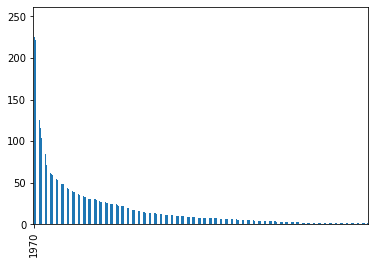

In [54]:
# plot YTM=0 incidents
import matplotlib.dates as mdates
ax = zero.plot(kind='bar')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

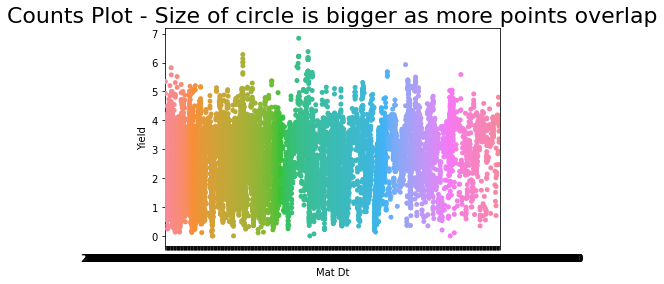

In [22]:
# Draw Stripplot
figsize=(16,10)    
sns.stripplot(trades['Mat Dt'], trades['Yield'])

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()